<a href="https://colab.research.google.com/github/gauravguptagtm/100-days-of-deep-learning/blob/main/DL_18_Weight_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What not to do?

- Case 1: Zero Initialization
  - No update in case of Relu, tanh
  - In case of sigmoid, hidden layer work as single model and become linear model.

- Case 2: Non-zero constant value
  - Act as a single neuron on all activation function.

- Case 3: Random Initialization(small value)
  - in case of sigmoid and tanh, vanishing gradiant
  - in case of relu, large amount to time to converge.

- Case 4: Random Initialization(large value)[0-1]
  - tanh/sigmoid - saturation [slow training or Vanishing GP]
  - relu-unstable gradiant



# Technique to use

- Xavier\Glorot Init
  - Normal
$$
\sqrt{1/fan\_in}
$$
    where fan_in is no. of input coming in that node.
  - Uniform
$$
limit = \sqrt{6/fan\_in+fan\_out}
$$
    We initialize b/w [-limit, limit].
- He Init
  - Normal
$$
\sqrt{2/fan\_in}
$$
  - Unform
$$
limit = \sqrt{6/fan\_in}
$$
    We initialize b/w [-limit, limit].
- Tanh and sigmoid give good result with Xavier\Glorot Init.
- Relu give good result with He Init.

# Xavier/Glorot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
df = pd.read_csv("/content/ushape.csv", names=['X', 'y', 'class'], )

In [8]:
df.head()

,X,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


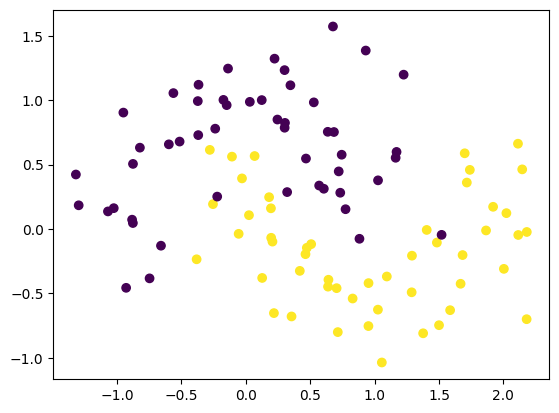

In [10]:
plt.scatter(df['X'],df['y'],c=df['class'])

In [11]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [24]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.get_weights()

[array([[ 0.5732568 ,  0.2544943 , -0.52253056,  0.29324597, -0.15218723,
          0.60411197,  0.3342095 , -0.68685925, -0.6925361 ,  0.53846747],
        [ 0.05945945,  0.15211254, -0.48877954, -0.3155732 , -0.14171171,
         -0.6575401 , -0.00624686,  0.04342943,  0.07083017, -0.68599826]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3634683 , -0.20679665, -0.4292327 ,  0.1341387 , -0.3241597 ,
          0.14271826,  0.4871297 , -0.23329449,  0.4530493 , -0.4685461 ],
        [ 0.05277342,  0.09925491,  0.21622568, -0.53588563, -0.04845676,
         -0.43251932, -0.37605795, -0.00628871,  0.24324578, -0.30040824],
        [ 0.35471725,  0.4650979 ,  0.5040549 ,  0.54564714, -0.22212705,
          0.439708  ,  0.31930327, -0.31118613, -0.26410577,  0.00668657],
        [-0.39432853, -0.18424043, -0.3474921 , -0.18843293,  0.29755384,
          0.02108854, -0.30731815,  0.09046549, -0.00934285, -0.2079637 ],
        [ 0.38353

In [26]:
initial_weights = model.get_weights()

In [27]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[-0.54505   ,  0.29460558,  0.08352884, -0.6201548 ,  0.25047064,
          1.2376884 , -0.21423134, -0.7296325 , -0.2896172 , -0.3940183 ],
        [ 1.0478829 , -0.28041992, -0.3348496 ,  0.38488707, -0.25328848,
          0.28394812,  0.5087309 , -1.3108652 ,  1.0505108 ,  0.02200508]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3199722 , -0.07345332,  0.15356861,  0.3569758 , -0.43159682,
          0.22054   , -0.2568099 ,  0.01057252, -0.10456917,  0.3337255 ],
        [ 0.3289995 , -0.45874718,  0.3717611 , -0.23910077, -0.46321547,
          0.45510453,  0.03347833, -0.14482813,  0.63686436, -0.5813598 ],
        [ 0.0851598 ,  0.24555239,  0.12088756, -0.15731826, -0.04786655,
         -0.24540818, -0.24630898,  0.12487578,  0.3197489 ,  0.17716302],
        [-0.16158172, -0.3128451 , -0.3951891 , -0.00827167,  0.05269967,
          0.07047577, -0.16486076,  0.09362192, -0.11333199,  0.24231909],
        [-0.42889

In [30]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 178ms/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6842 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 42ms/step - loss: 0.6801 - accuracy: 0.5000 - val_loss: 0.6787 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6760 - accuracy: 0.5000 - val_loss: 0.6735 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6723 - accuracy: 0.5000 - val_loss: 0.6686 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6681 - accuracy: 0.5000 - val_loss: 0.6638 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6643 - accuracy: 0.4750 - val_loss: 0.6590 - val_accuracy: 0.4500
Epoch 8/100
3/3 [==

In [32]:
model.get_weights()

[array([[-0.35182023,  0.37949276,  0.23195529, -0.727827  ,  0.3621864 ,
          1.3555689 ,  0.02831817, -0.45185986, -0.24291652, -0.5422409 ],
        [ 1.2717489 , -0.54105705, -0.59936285,  0.43934542, -0.53184396,
          0.1171023 ,  0.77885777, -1.5953724 ,  1.2190909 ,  0.16291173]],
       dtype=float32),
 array([0.18500008, 0.07586765, 0.13067517, 0.05204262, 0.10429515,
        0.06788695, 0.2432628 , 0.2950613 , 0.16380481, 0.00151995],
       dtype=float32),
 array([[ 1.89916804e-01, -7.34533221e-02,  1.53568611e-01,
          7.18849301e-01, -4.31596816e-01,  3.98143768e-01,
         -4.47962582e-01, -2.45876849e-01, -1.84555039e-01,
          1.93896770e-01],
        [ 5.17233789e-01, -4.58747178e-01,  3.08060735e-01,
         -1.31623745e-01, -4.63215470e-01,  3.54718715e-01,
          2.43195772e-01,  1.32419959e-01,  8.06763172e-01,
         -4.29659277e-01],
        [ 3.08466971e-01,  2.45552391e-01,  4.99965325e-02,
         -6.76589012e-02, -4.78665493e-02, -

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

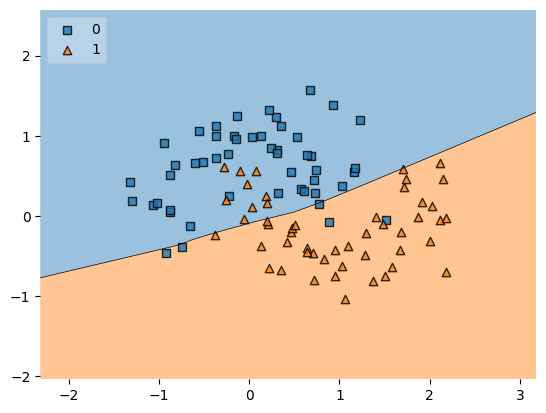

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)